In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("full_dataset.csv")
final_test_set = pd.read_csv("final_test_set.csv")
final_test_set.tail(10)[['hPos','aPos','target']]

,hPos,aPos,target
370,7.0,12.0,0
371,11.0,19.0,2
372,16.0,6.0,0
373,4.0,14.0,2
374,2.0,13.0,2
375,10.0,5.0,2
376,17.0,1.0,0
377,3.0,9.0,2
378,18.0,20.0,0
379,15.0,8.0,2


In [2]:
df.shape

(6460, 38)

In [3]:
final_test_set.shape

(380, 38)

In [4]:
# from sklearn.model_selection import StratifiedShuffleSplit

# def get_train_test_split(data):
#     split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
#     for train_index, test_index in split.split(data, data["target"]):
#         data_train = data.loc[train_index]
#         data_test = data.loc[test_index]
#     return data_train, data_test

# train,test = get_train_test_split(df)
test = df[4940:].copy()
train = df[:4940].copy()

In [5]:
X_train = train.drop('target',axis=1)
y_train = train['target']
X_test = test.drop('target',axis=1)
y_test = test['target']
final_test_set_X = final_test_set.drop('target',axis=1)
final_test_set_y = final_test_set['target']

In [6]:
use_list = ['aPosLS','hPosLS','hGD5','aSpent','aPtsPG','hSPG','hGCPG','aPos','aSTPG','aGSPG','hSTPG','aSPG','aGD7','hPos','aGD5','hPtsPG','hSpent','aPTSPG7','hGD7']
X_train = X_train[use_list]
X_test = X_test[use_list]
final_test_set_X = final_test_set_X[use_list]
X_train.head()

,aPosLS,hPosLS,hGD5,aSpent,aPtsPG,hSPG,hGCPG,aPos,aSTPG,aGSPG,hSTPG,aSPG,aGD7,hPos,aGD5,hPtsPG,hSpent,aPTSPG7,hGD7
0,18,18,0.0,18.07,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,18.72,0.0,0.0
1,9,5,0.0,8.92,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,47.15,0.0,0.0
2,12,14,0.0,29.52,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,17.10,0.0,0.0
3,15,16,0.0,0.00,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,11.99,0.0,0.0
4,13,3,0.0,31.03,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,47.84,0.0,0.0


In [7]:
X_test.shape

(1520, 19)

In [8]:
X_train = tf.keras.utils.normalize(X_train.values,axis=1)
X_test = tf.keras.utils.normalize(X_test.values,axis=1)
final_test_set_X = tf.keras.utils.normalize(final_test_set_X.values,axis=1)

In [9]:
knn = KNeighborsClassifier(n_neighbors=109)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test)*100)

52.17105263157895


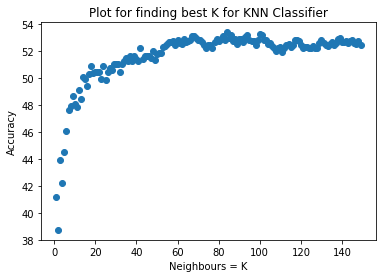

In [10]:
from sklearn.neighbors import KNeighborsClassifier
ks = [x for x in range(1,150)]
subset_accuracies = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    subset_accuracies.append(knn.score(X_test,y_test)*100)
plt.scatter(ks,subset_accuracies)
plt.xlabel("Neighbours = K")
plt.ylabel("Accuracy")
plt.title("Plot for finding best K for KNN Classifier")
plt.show()

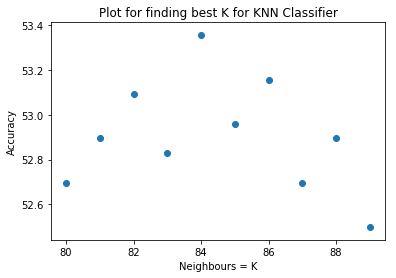

In [11]:
from sklearn.neighbors import KNeighborsClassifier
ks = [x for x in range(80,90)]
subset_accuracies = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    subset_accuracies.append(knn.score(X_test,y_test)*100)
plt.scatter(ks,subset_accuracies)
plt.xlabel("Neighbours = K")
plt.ylabel("Accuracy")
plt.title("Plot for finding best K for KNN Classifier")
plt.show()

In [12]:
knn2 = KNeighborsClassifier(n_neighbors=84)
knn2.fit(X_train,y_train)
y_pred2 = knn2.predict(X_test)
print(knn2.score(X_test,y_test)*100)

53.35526315789474


In [13]:
print(knn2.score(final_test_set_X,final_test_set_y)*100)

51.84210526315789


In [18]:
preds = knn2.predict(final_test_set_X)
preds

array([2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,

In [17]:
from collections import Counter
Counter(preds)

Counter({2: 281, 0: 95, 1: 4})